##### This notebook was created by Oluwaferanmi Alalade on the 19th of February, 2022

### The Questions I tried to answer
- What product produces the most revenue?
- What product is sold the most?
- What part of the day do most of the orders come in?

In [205]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline
from matplotlib import style
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [206]:
df = pd.read_excel(r"C:\Users\hp\Documents\adomm.xlsx") #Importing the data
df.head() #View the top 5 columns

,S/N,Date,Time,Item,Unit Sales,Whole Sales,Package 1,Package 2,Package 3,Selling Price,Bank Payment,Purchase Price,Deductions,Credit Sales,Credit Purchase Price,Sold To,Sold By,Reciept Number
0,1,2020-05-01,08:52:00,Grow-max grower mash,NaN,NaN,12(12),NaN,NaN,1440.0,NaN,1200.0,NaN,NaN,NaN,Mr soyinka,Adesiyan Funmi,00027849-1
1,2,2020-05-01,09:05:00,Aller aqua 2mm,NaN,NaN,2(2),NaN,NaN,1220.0,NaN,1000.0,NaN,NaN,NaN,daddy,Adesiyan Funmi,00027850-1
2,3,2020-05-01,09:06:00,Aller aqua 2mm,NaN,NaN,1(1),NaN,NaN,610.0,NaN,500.0,NaN,NaN,NaN,Abduramon,Adesiyan Funmi,00027851-1
3,4,2020-05-01,09:08:00,Soya meal ord./ Karma Soya,NaN,NaN,5(5),NaN,NaN,625.0,NaN,850.0,NaN,NaN,NaN,Mr baloguin,Adesiyan Funmi,00027852-1
4,5,2020-05-01,09:22:00,Skretting 2mm,NaN,NaN,8(8),NaN,NaN,5520.0,NaN,4800.0,NaN,NaN,NaN,Olasheu,Adesiyan Funmi,00027853-1


In [207]:
df.head()

,S/N,Date,Time,Item,Unit Sales,Whole Sales,Package 1,Package 2,Package 3,Selling Price,Bank Payment,Purchase Price,Deductions,Credit Sales,Credit Purchase Price,Sold To,Sold By,Reciept Number
0,1,2020-05-01,08:52:00,Grow-max grower mash,NaN,NaN,12(12),NaN,NaN,1440.0,NaN,1200.0,NaN,NaN,NaN,Mr soyinka,Adesiyan Funmi,00027849-1
1,2,2020-05-01,09:05:00,Aller aqua 2mm,NaN,NaN,2(2),NaN,NaN,1220.0,NaN,1000.0,NaN,NaN,NaN,daddy,Adesiyan Funmi,00027850-1
2,3,2020-05-01,09:06:00,Aller aqua 2mm,NaN,NaN,1(1),NaN,NaN,610.0,NaN,500.0,NaN,NaN,NaN,Abduramon,Adesiyan Funmi,00027851-1
3,4,2020-05-01,09:08:00,Soya meal ord./ Karma Soya,NaN,NaN,5(5),NaN,NaN,625.0,NaN,850.0,NaN,NaN,NaN,Mr baloguin,Adesiyan Funmi,00027852-1
4,5,2020-05-01,09:22:00,Skretting 2mm,NaN,NaN,8(8),NaN,NaN,5520.0,NaN,4800.0,NaN,NaN,NaN,Olasheu,Adesiyan Funmi,00027853-1


In [208]:
# # df["Quantity"] = df[['Package 1', 'Package 2', 'Package 3']].agg('-'.join, axis=1)
# df["Quantity"] = df["Package 1"].astype(str)+"-"+ df["Package 2"].astype(str) +"-"+ df["Package 3"]
# df["Quantity"].value_counts()

In [209]:
df.dtypes #To know the datatypes of each column

S/N                               int64
Date                     datetime64[ns]
Time                             object
Item                             object
Unit Sales                      float64
Whole Sales                     float64
Package 1                        object
Package 2                        object
Package 3                        object
Selling Price                   float64
Bank Payment                    float64
Purchase Price                  float64
Deductions                      float64
Credit Sales                    float64
Credit Purchase Price           float64
Sold To                          object
Sold By                          object
Reciept Number                   object
dtype: object

Since most of the columns are already in the desired data types, there is no need for much formatting

In [210]:
df.describe()

,S/N,Unit Sales,Whole Sales,Selling Price,Bank Payment,Purchase Price,Deductions,Credit Sales,Credit Purchase Price
count,1349.000000,0.0,0.0,1300.000000,0.0,1300.000000,42.000000,7.000000,7.000000
mean,675.000000,NaN,NaN,12946.800000,NaN,11580.605008,33051.904762,73821.428571,48065.250000
std,389.567067,NaN,NaN,43645.305457,NaN,38657.196694,82188.507950,115466.105622,80558.917097
min,1.000000,NaN,NaN,14.000000,NaN,0.000000,270.000000,3000.000000,0.000000
25%,338.000000,NaN,NaN,480.000000,NaN,240.000000,1840.000000,6250.000000,1403.375000
50%,675.000000,NaN,NaN,1400.000000,NaN,1000.000000,4000.000000,23100.000000,4000.000000
75%,1012.000000,NaN,NaN,6000.000000,NaN,4283.000000,9900.000000,76575.000000,57750.000000
max,1349.000000,NaN,NaN,558000.000000,NaN,450000.000000,456000.000000,325000.000000,214150.000000


In [211]:
df.columns

Index(['S/N', 'Date', 'Time', 'Item', 'Unit Sales', 'Whole Sales', 'Package 1',
       'Package 2', 'Package 3', 'Selling Price', 'Bank Payment',
       'Purchase Price', 'Deductions', 'Credit Sales', 'Credit Purchase Price',
       'Sold To', 'Sold By', 'Reciept Number'],
      dtype='object')

In [212]:
max_date = df["Date"].max()
min_date = df["Date"].min()

print(f"The record of the Sales data is from {min_date} to {max_date}")

The record of the Sales data is from 2020-05-01 00:00:00 to 2020-05-21 00:00:00


## Data Cleaning
### Removing the data not needed for our exploration
 - Some columns are not needed for our analysis.
 - The products that were returned by customers have returned in bracket, they are not needed as we are concerned with sales.
 - Place the unit sales, wholesales, package1, package2, package3 into one column "Quantity" and remove the brackets

In [213]:
#Return a dataframe which excludes the product rows that were returned
df_new = df[df["Item"].str.contains("Returned") == False]

In [216]:
def comb_col(df):
    Quantity=[]
    for index,record in df.iterrows():
        if pd.notnull(record["Package 1"]):
            package = record["Package 1"]
        elif pd.notnull(record["Package 2"]):
            package = record["Package 2"]
        elif pd.notnull(record["Package 3"]):
            package = record["Package 3"]
        elif pd.notnull(record["Unit Sales"]):
            package = record["Unit Sales"]
        elif pd.notnull(record["Whole Sales"]):
            package = record["Whole Sales"]
        Quantity.append(float(str(package).split("(")[0]))
    return Quantity

In [217]:
df_new["Quantity"] = comb_col(df_new)

C:\Users\hp\AppData\Local\Temp/ipykernel_17644/1403703603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Quantity"] = comb_col(df_new)


In [218]:
df_new["Quantity"].value_counts()

1.0       422
2.0       230
3.0        88
5.0        84
4.0        72
         ... 
52.0        1
90.0        1
69.0        1
1700.0      1
87.0        1
Name: Quantity, Length: 75, dtype: int64

In [219]:
df_new.head()

,S/N,Date,Time,Item,Unit Sales,Whole Sales,Package 1,Package 2,Package 3,Selling Price,Bank Payment,Purchase Price,Deductions,Credit Sales,Credit Purchase Price,Sold To,Sold By,Reciept Number,Quantity
0,1,2020-05-01,08:52:00,Grow-max grower mash,NaN,NaN,12(12),NaN,NaN,1440.0,NaN,1200.0,NaN,NaN,NaN,Mr soyinka,Adesiyan Funmi,00027849-1,12.0
1,2,2020-05-01,09:05:00,Aller aqua 2mm,NaN,NaN,2(2),NaN,NaN,1220.0,NaN,1000.0,NaN,NaN,NaN,daddy,Adesiyan Funmi,00027850-1,2.0
2,3,2020-05-01,09:06:00,Aller aqua 2mm,NaN,NaN,1(1),NaN,NaN,610.0,NaN,500.0,NaN,NaN,NaN,Abduramon,Adesiyan Funmi,00027851-1,1.0
3,4,2020-05-01,09:08:00,Soya meal ord./ Karma Soya,NaN,NaN,5(5),NaN,NaN,625.0,NaN,850.0,NaN,NaN,NaN,Mr baloguin,Adesiyan Funmi,00027852-1,5.0
4,5,2020-05-01,09:22:00,Skretting 2mm,NaN,NaN,8(8),NaN,NaN,5520.0,NaN,4800.0,NaN,NaN,NaN,Olasheu,Adesiyan Funmi,00027853-1,8.0


In [220]:
#Removing the columns that are not useful to our analysis
#Unit sales, wholesales, Package 1, 2, 3, Deductions, Receipt Number, Credit purchase price, Bank payment, Sold By
df_new.drop(["Unit Sales", "Whole Sales", "Package 1", "Package 2", "Package 3", "Deductions", "Reciept Number", 
         "Credit Purchase Price", "Bank Payment", "Sold By", "Credit Sales"], axis = 1, inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 - Filling the missing values
 - Checking for duplicate transactions

In [221]:
print(df_new.isnull().sum()) #To know how many empty cells in each column

S/N               0
Date              0
Time              0
Item              0
Selling Price     7
Purchase Price    7
Sold To           3
Quantity          0
dtype: int64


In [222]:
df_new[["Selling Price", "Purchase Price"]] = df_new[["Selling Price", "Purchase Price"]].replace(np.nan,0)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [170]:
df_new["Sold To"] = df_new["Sold To"].replace(np.nan,"No record")

C:\Users\hp\AppData\Local\Temp/ipykernel_17644/3625660371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Sold To"] = df_new["Sold To"].replace(np.nan,"No record")


In [171]:
print(df_new.isnull().sum())

S/N               0
Date              0
Time              0
Item              0
Selling Price     0
Purchase Price    0
Sold To           0
Quantity          0
dtype: int64


In [14]:
# df.to_excel("adom2.xlsx", index=False)

In [15]:
df_new["Item"].value_counts()

 Wheat bran                    179
 New Maize                     121
 Soya meal ord./ Karma Soya     81
 Skretting 2mm                  58
 Biggy broiler mash             47
                              ... 
 Ovatide                         1
 Fish cure                       1
 Fish grow                       1
 Chemsate                        1
 Aller Aqua 8mm                  1
Name: Item, Length: 76, dtype: int64

In [16]:
df_new.head()

,S/N,Date,Time,Item,Selling Price,Purchase Price,Sold To
0,1,2020-05-01,08:52:00,Grow-max grower mash,1440.0,1200.0,Mr soyinka
1,2,2020-05-01,09:05:00,Aller aqua 2mm,1220.0,1000.0,daddy
2,3,2020-05-01,09:06:00,Aller aqua 2mm,610.0,500.0,Abduramon
3,4,2020-05-01,09:08:00,Soya meal ord./ Karma Soya,625.0,850.0,Mr baloguin
4,5,2020-05-01,09:22:00,Skretting 2mm,5520.0,4800.0,Olasheu


In [17]:
df_new.to_excel("Adom_products2.xlsx", index=False)

In [164]:
product_list = df_new["Item"].value_counts()

In [165]:
print(product_list.index)

Index([' Wheat bran', ' New Maize', ' Soya meal ord./ Karma Soya',
       ' Skretting 2mm', ' Biggy broiler mash', ' Aller aqua 2mm', ' PKC',
       ' Salt', ' Blue Crown Feeds 4mm', ' Corn bran', ' Blue Crown Feeds 2mm',
       ' GNC', ' Skretting 1.8mm', ' Limestone', ' Blue Crown Feeds 6mm',
       ' Skretting 4.5mm', ' Skretting 1mm', ' Skretting 3mm',
       ' Blue Crown Feeds 3mm', ' Skretting 6mm', ' Grow-max grower mash',
       ' Methionine', ' Lysine', ' Bioad', ' Aller aqua 3mm', ' Bone meal',
       ' Fish meal 72%', ' Blue Crown Feeds 9mm', ' Rice bran',
       ' Poultry Meal', ' Skretting 8mm', ' Micromix layer',
       ' Skretting 0.7mm', ' DCP', ' Micromix grower', ' Lahda soya oil',
       ' Aller aqua 4.5mm', ' Eggmaster', ' Aller Aqua 0.4mm', ' Oxytet pure',
       ' Maxiyield big', ' Oxytet ord', ' Skretting 6mm pellet', ' Adom sack',
       ' Micromix broiler', ' Vit C', ' Ovulin', ' Hack', ' Snipper Small',
       ' Maxiyield med', ' Skretting 4.5mm pellet', ' All

In [166]:
print(product_list.values)

[179 121  81  58  47  47  41  40  38  36  34  30  30  30  27  26  25  24
  22  22  21  20  19  19  18  18  17  17  17  12  12   9   9   8   7   7
   7   6   6   6   6   6   6   6   5   5   5   5   4   3   3   3   3   3
   3   3   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1]


In [167]:
prod_df = pd.DataFrame({
                        "Products": product_list.index,
                        "No of Times purchased": product_list.values 
                       })

In [168]:
prod_df

,Products,No of Times purchased
0,Wheat bran,179
1,New Maize,121
2,Soya meal ord./ Karma Soya,81
3,Skretting 2mm,58
4,Biggy broiler mash,47
...,...,...
71,Ovatide,1
72,Fish cure,1
73,Fish grow,1
74,Chemsate,1


In [169]:
# fig = plt.figure(figsize=(25,8))
# ax = fig.add_subplot(1,1,1)
# sns.barplot(x="Products", y="No of Times purchased", data = prod_df, color = 'blue')
# ax.tick_params(axis='x', labelrotation=90, labelsize=15)
# ax.tick_params(axis='y', labelsize=20)

In [170]:
fig = px.bar(prod_df,x="Products", y="No of Times purchased", 
             labels={"Products": "Products",
                     "Packs sold": "No of Times purchased",
             },
             title='Contribution of each product to total sales', 
             width = 1500, 
             height = 500)
             
fig.show()

## Time of order
To have an insight into when the most orders come in
 - Between 4am and 8am was classified as "Early morning"
 - Between 8am and 12noon was classified as "morning"
 - Between 12noon and 4pm was classified as Noon
 - 4pm and 8pm classified as eve
 - after 8pm and before 12 midnight as "Night"
 - Before 4am

In [171]:
def f(data):
    """
    This function takes in the dataset
    and returns the hour of the day the
    order was
    """
    hour_of_day = []
    for index,record in data.iterrows():
        x = int(record["Time"].hour)
        if (x > 4) and (x <= 8):
            hour="Early Morning"
        elif (x > 8) and (x <= 12 ):
            hour='Morning'
        elif (x > 12) and (x <= 16):
            hour='Noon'
        elif (x > 16) and (x <= 20) :
            hour='Eve'
        elif (x > 20) and (x <= 24):
            hour='Night'
        elif (x > 24) and (x < 4):
            hour='Late Night'
        hour_of_day.append(hour)
    return hour_of_day

print(f.__doc__)


    This function takes in the dataset
    and returns the hour of the day the
    order was
    


In [172]:
df_new["Hour of Day"] = f(df_new)

C:\Users\hp\AppData\Local\Temp/ipykernel_5444/3478219884.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Hour of Day', ylabel='count'>

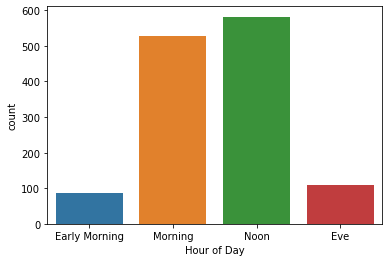

In [173]:
# hour_day = df_new["Hour of Day"].value_counts()
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel("Number of Orders")
# ax.set_ylabel("Hour of Day")
# ax.set_title("Number of orders during hours of the Day")
# sns.barplot(x = hour_day.values, y = hour_day.index)
sns.countplot(df_new["Hour of Day"])

Most of the orders are at noon

### The products that generate the most revenue

In [193]:
item_sum = df_new[["Item", "Selling Price","Purchase Price"]].groupby(["Item"]).sum().sort_values(by='Selling Price', ascending = False)

In [194]:
item_sum.reset_index(inplace=True)

In [195]:
item_sum_sliced = item_sum[0:11]

In [196]:
item_sum_sliced

,Item,Selling Price,Purchase Price
0,New Maize,4923966.0,3293325.00
1,Soya meal ord./ Karma Soya,2846829.0,3945530.00
2,Wheat bran,2315805.0,1466199.39
3,Fish meal 72%,1141625.0,920500.00
4,DCP,784900.0,700750.00
5,Aller aqua 2mm,613650.0,523500.00
6,Methionine,502625.0,491250.00
7,Aller aqua 3mm,393795.0,159456.78
8,Poultry Meal,334800.0,3530.20
9,Bioad,282250.0,296100.00


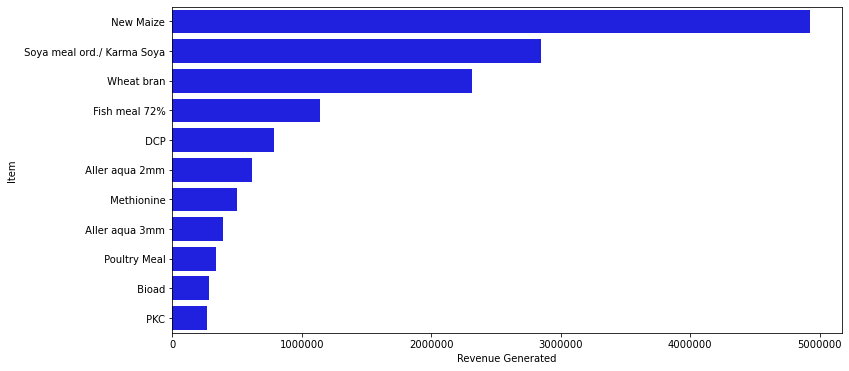

In [197]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x="Selling Price", y="Item", data= item_sum_sliced, color='blue')
ax.set(xlabel="Revenue Generated", ylabel="Item")
plt.ticklabel_format(style='plain', axis='x')
plt.show(ax)

In [198]:
item_sum

,Item,Selling Price,Purchase Price
0,New Maize,4923966.0,3293325.00
1,Soya meal ord./ Karma Soya,2846829.0,3945530.00
2,Wheat bran,2315805.0,1466199.39
3,Fish meal 72%,1141625.0,920500.00
4,DCP,784900.0,700750.00
...,...,...,...
71,Fishbiotics,500.0,450.00
72,Fish grow,450.0,430.00
73,Royal Guard germicide Small,400.0,0.00
74,Amequat,0.0,0.00


In [204]:
Total_amount_sold = []
Total_amount_purchased = []
for prod in prod_df["Products"]:
    for product,sell,purchase in zip(item_sum["Item"], item_sum["Selling Price"], item_sum["Purchase Price"]):
        if product == prod:
            Total_amount_sold.append(sell)
            Total_amount_purchased.append(purchase)
        else:
            continue

In [206]:
prod_df["Total revenue"] = Total_amount_sold
prod_df["Total cost"] = Total_amount_purchased

In [207]:
prod_df

,Products,No of Times purchased,Total revenue,Total cost
0,Wheat bran,179,2315805.0,1466199.39
1,New Maize,121,4923966.0,3293325.00
2,Soya meal ord./ Karma Soya,81,2846829.0,3945530.00
3,Skretting 2mm,58,202950.0,177000.00
4,Biggy broiler mash,47,15750.0,14700.00
...,...,...,...,...
71,Ovatide,1,4000.0,3500.00
72,Fish cure,1,2000.0,1800.00
73,Fish grow,1,450.0,430.00
74,Chemsate,1,1250.0,0.00


In [208]:
prod_df.to_excel("Adom_products.xlsx", index=False)